# Load dataset

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load dataset

In [2]:
sales = pd.read_csv("D:\\python\\Dataset\\Sales Dataset.csv")

head() shows the first five rows of each column.

In [3]:
sales.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


shape show the number of rows and column in the dataset

In [4]:
sales.shape

(1000, 8)

isna() shows the null valus in the dataset.

In [5]:
sales.isna().sum()

Unnamed: 0          0
Date                0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

## EDA (Exploratory Data Analysis)

Graph to show the Effect of Price per unit on Product category.

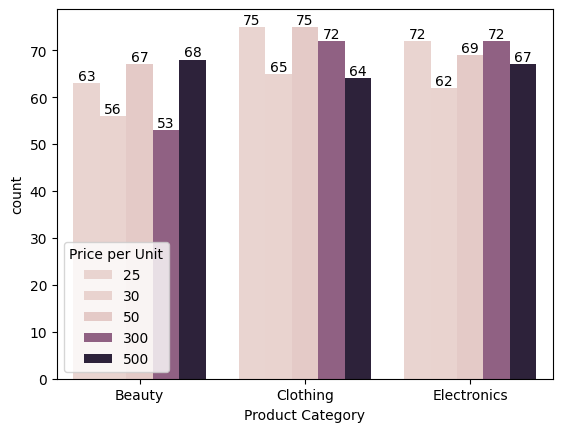

In [6]:
ax = sns.countplot(data=sales, x="Product Category", hue='Price per Unit')
for bars in ax.containers:
    ax.bar_label(bars)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12276\1349797671.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sales, x='Product Category', y='Total Amount', palette='mako')


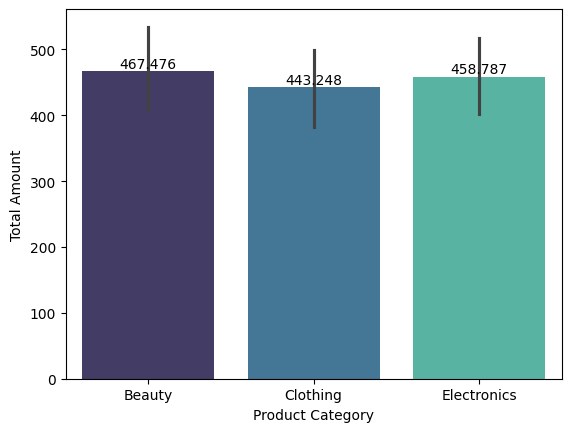

In [7]:
ax = sns.barplot(data = sales, x='Product Category', y='Total Amount', palette='mako')
for bar in ax.containers:
    ax.bar_label(bar)

Graph to show the effect of price per unit on Quantity

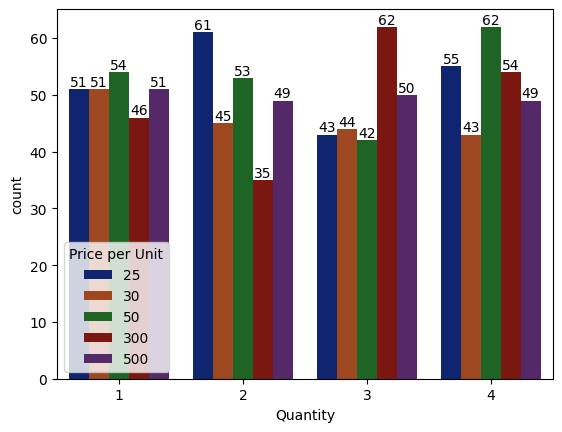

In [8]:
ax = sns.countplot(data=sales,  x='Quantity', hue='Price per Unit', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales['Product Category'] = sales['Product Category'].replace(['Beauty', 'Clothing','Electronics'],[0,1,2])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12276\1236225821.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sales['Product Category'] = sales['Product Category'].replace(['Beauty', 'Clothing','Electronics'],[0,1,2])


In [11]:
X=sales[['Product Category','Quantity', 'Price per Unit']]
y = sales['Total Amount']

# Predicting Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, f1_score

Dividing the dataset into training and testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [14]:
LR = LinearRegression()

In [15]:
LR.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = LR.predict(X_test)

In [17]:
r2_score(y_test, y_pred)

0.856965397706587

$r^2$ score in Linear Regression  ->  85%

### Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
RFR = RandomForestRegressor()


In [25]:
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
y_p = RFR.predict(X_test)

In [27]:
r2_score(y_test,y_p)

1.0

$r^2$ score by KNeighboursRegressor -> 100%

### K-Neighbours Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
KNN = KNeighborsRegressor(42)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

In [30]:
r2_score(y_test, KNN_pred)

0.9841535242265818

$r^2$ score by KNeighboursRegressor -> 98%